In [1]:
%config InlineBackend.figure_format = "retina"

import numpy as np
import matplotlib.pyplot as plt

from utils.parse_pars import parse_pars
from spamm.run_spamm import spamm
import run_fe, run_pl, run_bc, run_hg, run_ne
from utils.add_in_quadrature import add_in_quadrature
from spamm.analysis import plot_best_models, plot_chains
from spamm.Samples import Samples
import corner

In [2]:
def generate_data(components=None, comp_params=None):

    all_wls = []
    all_fluxes = []
    all_errs = []
    comb_p = {}
    comp_names = {}
    
    for component in components:
        component = component.upper()
        if component == "PL":
            comp_wl, comp_flux, comp_err, comp_p = run_pl.create_pl(comp_params["PL"])
            comp_names["PL"] = True
            
        elif component == "FE":
            comp_wl, comp_flux, comp_err, comp_p = run_fe.create_fe(comp_params["FE"])
            comp_names["FE"] = True
            
        elif component == "BC" or component == "BPC":
            comp_wl, comp_flux, comp_err, comp_p = run_bc.create_bc(comp_params["BC"])
            comp_names["BC"] = True
            comp_names["BpC"] = True
            
        elif component == "HG" or component == "HG":
            comp_wl, comp_flux, comp_err, comp_p = run_hg.create_hg(comp_params["HG"])
            comp_names["HG"] = True

        elif component == "NEL":
            comp_wl, comp_flux, comp_err, comp_p = run_ne.create_ne(comp_params["NEL"])
            comp_names["NEL"] = True
            
        all_fluxes.append(comp_flux)
        all_wls.append(comp_wl)
        all_errs.append(comp_err)
        comb_p = {**comb_p, **comp_p}

    comb_wl = wl
    comb_flux = np.sum(all_fluxes, axis=0)
    comb_err = add_in_quadrature(all_errs)
    
    print(f"{LINEOUT}\nUsing components: {components}")
    
    return comb_wl, comb_flux, comb_err, all_fluxes, comp_names

PL params: {'norm_PL': 1e-14, 'slope1': 2.3, 'broken_pl': False}
ne params: {'width': 20, 'lines': [(3.0000000000000005e-14, 1549), (3.3000000000000005e-14, 1664), (5.000000000000001e-15, 1670), (2.0000000000000003e-14, 1750), (4.0000000000000006e-14, 1813), (2.2e-14, 2141), (3.4e-14, 2326), (4.2000000000000004e-14, 5006), (5.1000000000000004e-14, 5199), (3.8e-14, 5309), (1.1e-14, 6363), (1.9e-14, 8446), (4.8000000000000004e-14, 9068)]}
###########################################################################
Using components: ['PL', 'NEL', 'BC']


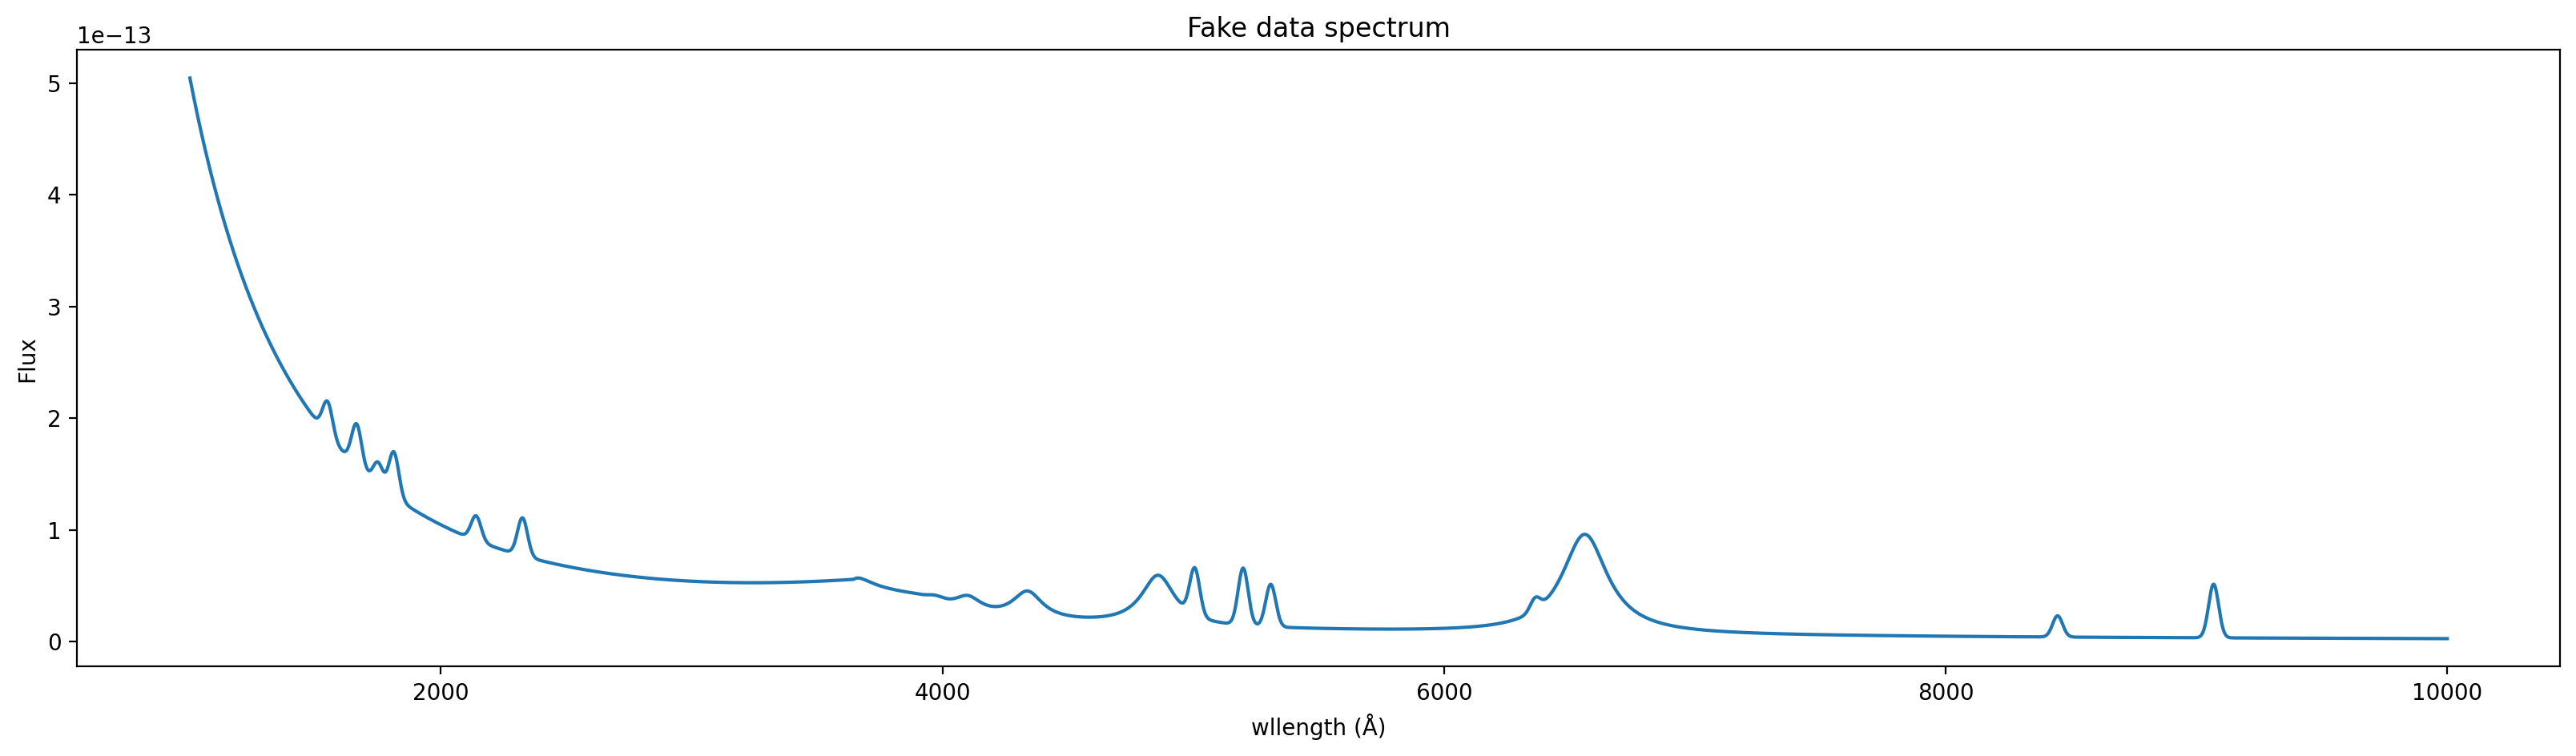

In [3]:
# This should be a wllength range from 1000-10,000A, every 0.5A
TEST_wl = parse_pars()["testing"]

# Create wllength array from min, max and step values
wl = np.arange(TEST_wl["wl_min"], TEST_wl["wl_max"], TEST_wl["wl_step"])
wl = np.arange(1000, 10000, 0.5)

# These values were picked by hand to provide the most realistic power law.
PL_PARAMS = {"norm_PL": 1e-14,
             "slope1": 2.3,
             "broken_pl": False,
             "wl": wl}

# The normalizations are drawn from a gaussian sample with mu=9.06e-15,
# sigma=3.08946e-15 (from 0->template max flux). fe_width is halfway 
# between range in parameters. wl is very close to template span (1075-7535)
FE_PARAMS = {"fe_norm_1": 1.07988504e-14,
             "fe_norm_2": 6.91877436e-15,
             "fe_norm_3": 5e-15,# 8.68930476e-15, 
             "fe_width": 5450,
             "no_templates": 3,
             "wl": wl}

# These values are just the midpoints of the parameter space in parameters.yaml
BC_PARAMS = {"bc_norm": 3e-14,
             "bc_tauBE": 1.,
             "bc_logNe": 5.5,
             "bc_loffset": 0.,
             "bc_lwidth": 5050.,
             "bc_Te": 15250.,
             "bc_lines": 201.5,
             "wl": wl}

# These values are just the midpoints of the parameter space in parameters.yaml
HG_PARAMS = {"hg_norm_1": 4e-16,
             "hg_norm_2": 2e-16,
             "hg_stellar_disp": 515,
             "no_templates": 2,
             "wl": wl}

NEL_PARAMS = {"width": 50, 
              "amp_1": 10, 
              "center_1": 4830,
              "amp_2": 5, 
              "center_2": 6800,
              "amp_3": 8, 
              "center_3": 3000,
              "wl": wl}

k=1e-15
NEL_PARAMS = {"width": 20, 
              "lines": [(30*k, 1549),
                        (33*k, 1664),
                        (5*k, 1670),
                        (20*k, 1750),
                        (40*k, 1813),
                        (22*k, 2141),
                        (34*k, 2326),
                        (42*k, 5006),
                        (51*k, 5199),
                        (38*k, 5309),
                        (11*k, 6363),
                        (19*k, 8446),
                        (48*k, 9068)],
              "wl": wl}

#{"AlII_1670_amp": 15, "AlII_1670_center": 1670,
#"NIII]_1750_amp": 20, "NIII]_1750_center": 1750,
#"SiII_1813_amp": 30, "SiII_1813_center": 1813}

LINEOUT = "#"*75

components=["PL", "HG", "BC", "FE"]
comp_params={"PL": PL_PARAMS, "HG": HG_PARAMS, "BC": BC_PARAMS, "FE": FE_PARAMS}

components=["PL", "BC"]
comp_params={"PL": PL_PARAMS, "BC": BC_PARAMS}

#components=["HG"]
#comp_params={"HG": HG_PARAMS}

components=["PL", "NEL", "BC"]
comp_params={"PL": PL_PARAMS, "NEL": NEL_PARAMS, "BC": BC_PARAMS}

#components=["NEL"]
#comp_params={"NEL": NEL_PARAMS}

#components=["PL"]
#comp_params={"PL": PL_PARAMS}

_, flux, flux_err, all_fluxes, comp_names = generate_data(components=components, comp_params=comp_params)
#mean_cont_signal = np.mean(all_fluxes[0])
#mean_cont_noise = 0.05*mean_cont_signal
#snp = mean_cont_signal/mean_cont_noise

noise = np.random.normal(0, 1, len(flux)) * 0.05*flux

fdeg = flux + noise

fig = plt.figure(figsize=(20,5))
plt.plot(wl, flux)
#plt.plot(wl, all_fluxes[0])
plt.title(f"Fake data spectrum")
plt.xlabel("wllength (Å)")
plt.ylabel("Flux");

In [18]:
class EmissionLine():
    def __init__(self, name, wavelength, amplitude, width, num_comp):
        self.name = name
        self.wavelength = wavelength
        self.amplitude = amplitude
        self.width = width
        self.num_components = num_comp
        self.params = [param for i in range(num_comp) for param in (f"{name}_loc_{i+1}", f"{name}_amp_{i+1}")]

In [20]:
test = EmissionLine("CIV", 1549.00, 10, 2, 1)
test.params

['CIV_loc_1', 'CIV_amp_1']

In [4]:
spamm(complist=comp_names, inspectrum=(wl, flux, flux_err), comp_params=comp_params, n_walkers=150, n_iterations=1000, 
      outdir="combined_example", picklefile="combined", parallel=True, par_file="parameters.yaml")

Using only the following lines: {'CIV_1549': 1549.05, 'OIII]_1664': 1664.15, 'AlII_1670': 1670.79, 'NIII]_1750': 1750.46, 'SiII_1813': 1813.98, 'NII]_2141': 2141.36, 'CII]_2326': 2326.58, '[OIII]_5006': 5006.84, '[NI]_5199': 5199.82, '[CaV]_5309': 5309.18, '[OI]_6363': 6363.78, 'OI_8446': 8446.5, '[SIII]_9086': 9068.9}


100%|███████████████████████████████████████| 1000/1000 [19:44<00:00,  1.18s/it]


[SPAMM]: Mean acceptance fraction: 0.228
[SPAMM]: Saved pickle file: combined_example/combined.pickle.gz
[SPAMM]: Execution time: 1189.478 seconds


{'model': <spamm.Model.Model at 0x146bd0850>,
 'comp_params': {'PL': {'norm_PL': 1e-14, 'slope1': 2.3, 'broken_pl': False},
  'NEL': {'width': 20,
   'lines': [(3.0000000000000005e-14, 1549),
    (3.3000000000000005e-14, 1664),
    (5.000000000000001e-15, 1670),
    (2.0000000000000003e-14, 1750),
    (4.0000000000000006e-14, 1813),
    (2.2e-14, 2141),
    (3.4e-14, 2326),
    (4.2000000000000004e-14, 5006),
    (5.1000000000000004e-14, 5199),
    (3.8e-14, 5309),
    (1.1e-14, 6363),
    (1.9e-14, 8446),
    (4.8000000000000004e-14, 9068)]},
  'BC': {'bc_norm': 3e-14,
   'bc_tauBE': 1.0,
   'bc_logNe': 5.5,
   'bc_loffset': 0.0,
   'bc_lwidth': 5050.0,
   'bc_Te': 15250.0,
   'bc_lines': 201.5},
  'wl': array([1000. , 1000.5, 1001. , ..., 9998.5, 9999. , 9999.5]),
  'flux': array([5.04454282e-13, 5.03875998e-13, 5.03298669e-13, ...,
         2.64508582e-15, 2.64476388e-15, 2.64444200e-15]),
  'err': array([2.52207959e-14, 2.51918159e-14, 2.51628836e-14, ...,
         1.26580312e-16, 

In [7]:
S = Samples("combined_example/combined.pickle.gz", outdir='combined_example', burn=600)
plot_best_models(S)

[SPAMM]: Saved combined_bestfits.png


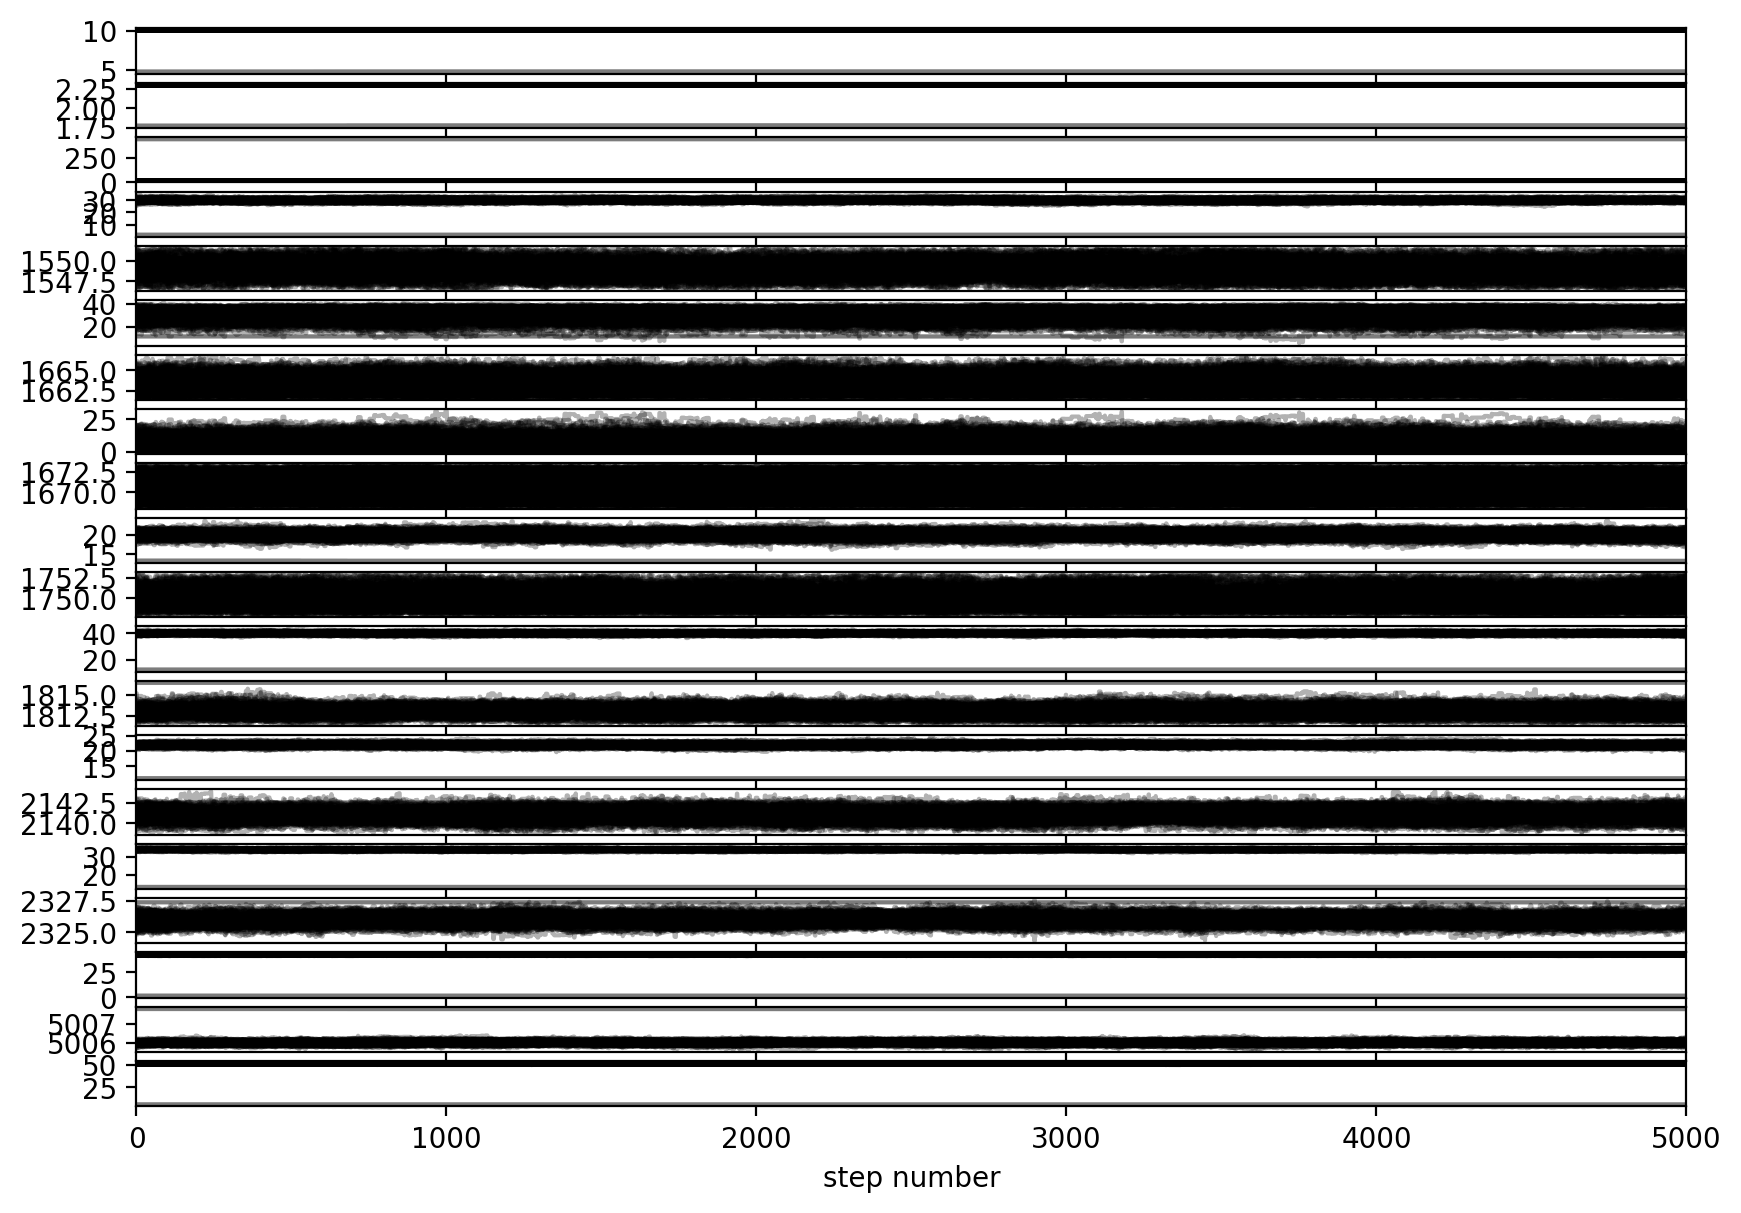

In [10]:
fig, axes = plt.subplots(20, figsize=(10, 7), sharex=True)
samples = S.model.sampler.get_chain(discard=8000)
#tau = S.model.sampler.get_autocorr_time()
for i in range(20):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");



In [ ]:
flat_samples = S.model.sampler.get_chain(discard=6000, thin=10, flat=True)
fig = corner.corner(flat_samples);

(-20000.0, 0.0)

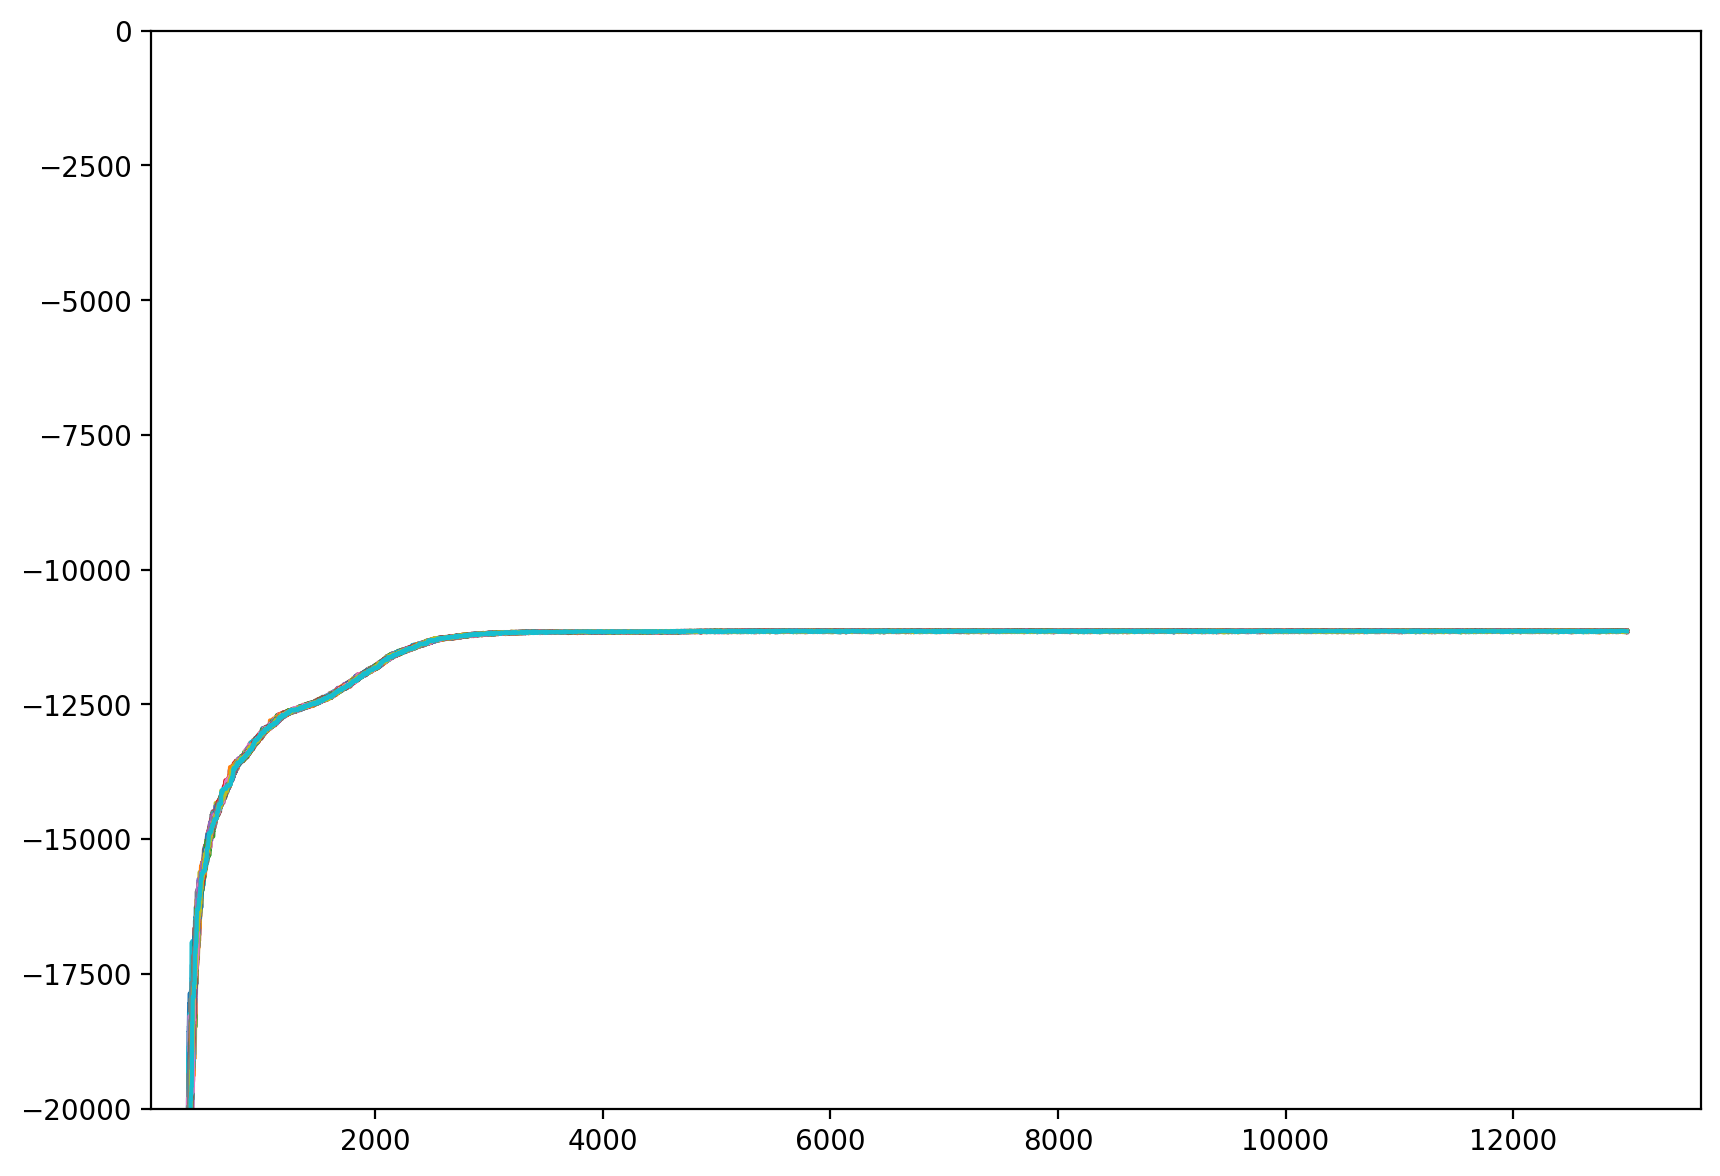

In [13]:
fig = plt.figure(figsize=(10, 7))
samples = S.model.sampler.get_log_prob()
plt.plot(samples[:,:]);
plt.xlim(30)
plt.ylim(-20000,0)

(-20000000.0, 0.0)

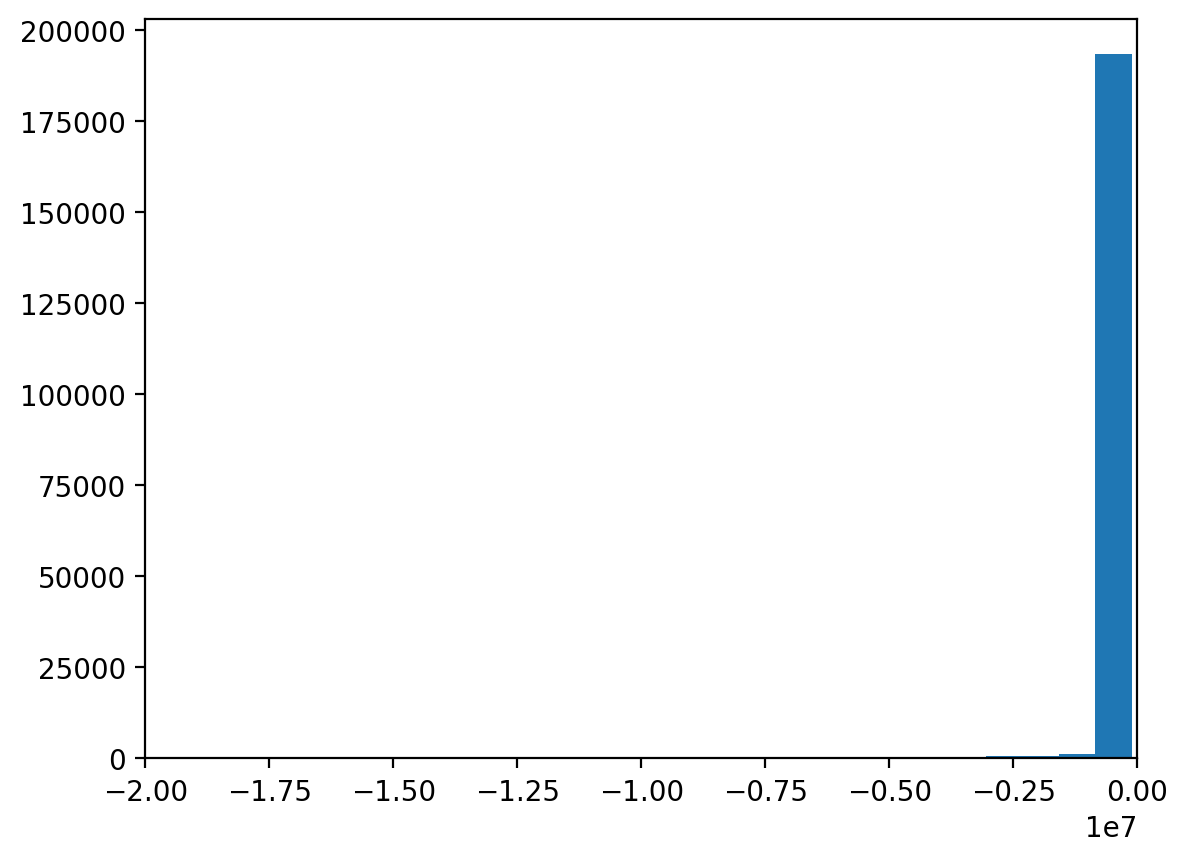

In [34]:
plt.hist(samples, bins=200);
plt.xlim(-0.2e8, 0)

In [9]:
import corner
flat_samples = S.model.sampler.get_chain(discard=1000, thin=20, flat=True)

fig = corner.corner(flat_samples, truths=[10, 2.3, 50, 10, 4830, 5, 6800, 8, 3000]);

/opt/homebrew/Caskroom/miniforge/base/envs/spamm/lib/python3.11/site-packages/arviz/data/base.py:221: UserWarning: More chains (1) than draws (0). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


AssertionError: I don't believe that you want more dimensions than samples!

In [ ]:
PL_PARAMS = {"norm_PL": 10,
             "slope1": 2.3,
             "broken_pl": False,
             "wl": wl}

# The normalizations are drawn from a gaussian sample with mu=9.06e-15,
# sigma=3.08946e-15 (from 0->template max flux). fe_width is halfway 
# between range in parameters. wl is very close to template span (1075-7535)
FE_PARAMS = {"fe_norm_1": 1.07988504e-14,
             "fe_norm_2": 6.91877436e-15,
             "fe_norm_3": 5e-15,# 8.68930476e-15, 
             "fe_width": 5450,
             "no_templates": 3,
             "wl": wl}

# These values are just the midpoints of the parameter space in parameters.yaml
BC_PARAMS = {"bc_norm": 3e-14,
             "bc_tauBE": 1.,
             "bc_logNe": 5.5,
             "bc_loffset": 0.,
             "bc_lwidth": 5050.,
             "bc_Te": 15250.,
             "bc_lines": 201.5,
             "wl": wl}

# These values are just the midpoints of the parameter space in parameters.yaml
HG_PARAMS = {"hg_norm_1": 4e-16,
             "hg_norm_2": 2e-16,
             "hg_stellar_disp": 515,
             "no_templates": 2,
             "wl": wl}

NEL_PARAMS = {"width": 50, 
              "amp_1": 10, 
              "center_1": 4830,
              "amp_2": 5, 
              "center_2": 6800,
              "amp_3": 8, 
              "center_3": 3000,
              "wl": wl}

LINEOUT = "#"*75

In [ ]:
samples = S.samples
for i in range(0, 2):
    chain = samples[:,i]
    print(len(chain))
    plt.plot(chain)